# Introduction
- This dataset contains detailed information about insurance customers, including their age, sex, body mass index (BMI), number of children, smoking status and region. Having access to such valuable insights allows analysts to get a better view into customer behaviour and the factors that contribute to their insurance charges. By understanding the patterns in this data set we can gain useful insight into how age,gender and lifestyle choices can affect a person's insurance premiums.
- This could be of great value when setting up an insurance plan or marketing campaigns that target certain demographics. Furthermore, this dataset provides us with an opportunity to explore deeper questions such as what are some possible solutions for increasing affordability when it comes to dealing with high charges for certain groups?
# It contains:
- Column name       	        Description
- Age               	        The age of the customer. (Integer)
- Children          	        The number of children the customer has. (Integer)
- Smoker            	        Whether or not the customer is a smoker. (Boolean)
- Region            	        The region the customer lives in. (String)
- Charges           	         The insurance charges for the customer. (Float)

# Step 1: Import The key Libraries

In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prediction-of-insurance-charges/insurance.csv


In [95]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/colab/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Read the DataSet

In [97]:
pofic = pd.read_csv('/kaggle/input/prediction-of-insurance-charges/insurance.csv')
print("Full train dataset shape is {}".format(pofic.shape))

Full train dataset shape is (1338, 8)


# Step 3. Basic Data View / Exploration

In [98]:
pofic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


# observation:
- we could understand that here there is no missing values exists in this dataset

In [99]:
pofic.dtypes

index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [100]:
pofic.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
pofic.sample(10)

,index,age,sex,bmi,children,smoker,region,charges
104,104,34,female,27.500,1,no,southwest,5003.85300
284,284,52,female,31.200,0,no,southwest,9625.92000
44,44,38,male,37.050,1,no,northeast,6079.67150
428,428,21,female,16.815,1,no,northeast,3167.45585
1099,1099,25,female,33.990,1,no,southeast,3227.12110
965,965,35,male,27.100,1,no,southwest,4746.34400
1204,1204,18,female,27.280,3,yes,southeast,18223.45120
281,281,54,male,40.565,3,yes,northeast,48549.17835
943,943,19,male,22.610,0,no,northwest,1628.47090
739,739,29,male,35.500,2,yes,southwest,44585.45587


In [102]:
print("\n Dataset.columns")
print(pofic.columns)


 Dataset.columns
Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')


In [103]:
pofic.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [104]:
# Find the percentage of missing values 
pofic.isnull().sum()/pofic.shape[0]*100

index       0.0
age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [105]:
# Finding the duplicates
pofic.duplicated().sum()

0

In [106]:
# identifying the garbage values
for i in pofic.select_dtypes(include="object").columns:
    print(pofic[i].value_counts())
    print("***"*10)

sex
male      676
female    662
Name: count, dtype: int64
******************************
smoker
no     1064
yes     274
Name: count, dtype: int64
******************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
******************************


# step 4: Data preprocessing - clean
1. Missing value handling is not required
2. drop unwanted

# observation
# 1. Find the Descriptive Statistics:
2. Calculate mean, median, and standard deviation of severity levels.

In [107]:
print("\nDataset Descriptive Statistics:")
print(pofic.describe())


Dataset Descriptive Statistics:
             index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


#  Step 5: EDA (Explorative Data Analytics)
- Conduct exploratory data analysis (EDA) to understand the dataset’s structure and identify key patterns and correlations.

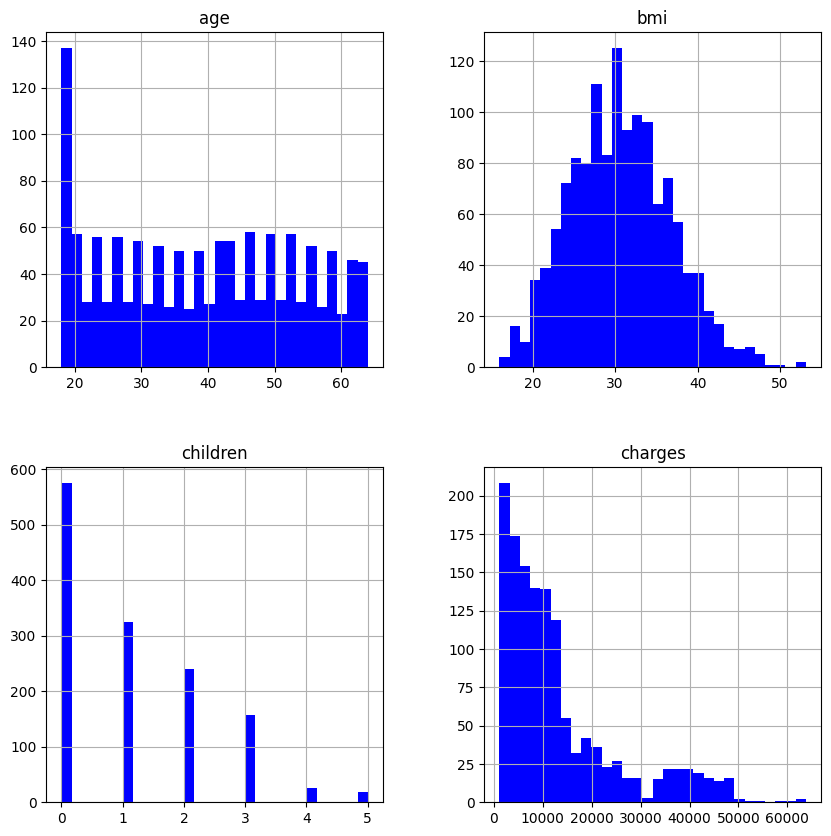

In [108]:
pofic[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

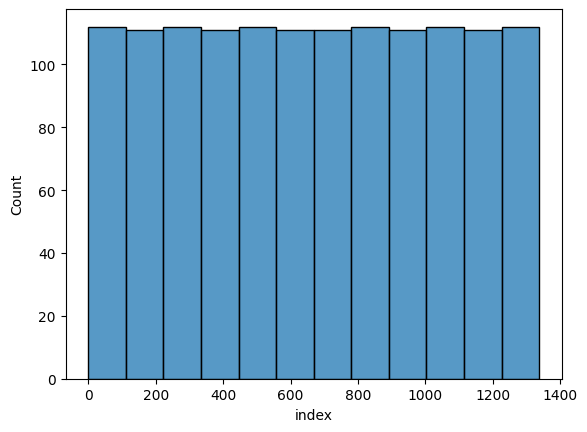

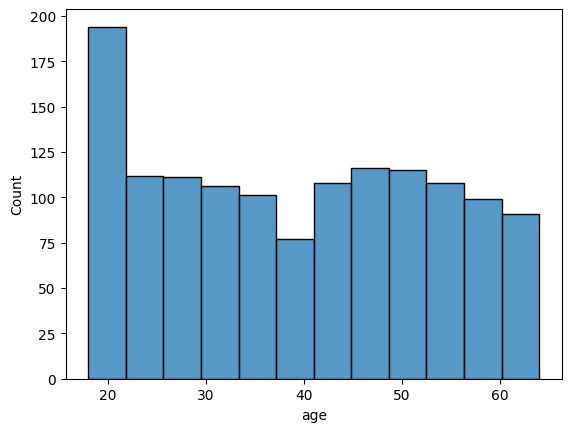

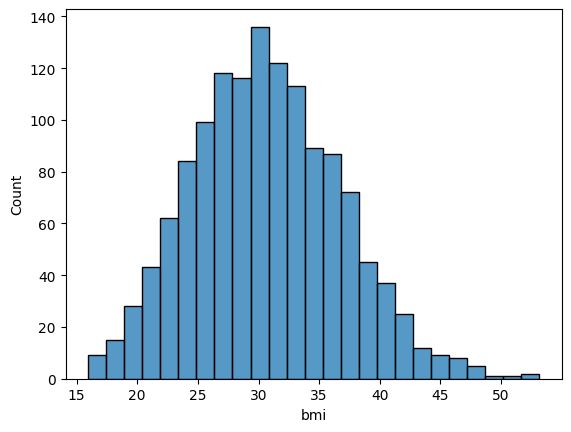

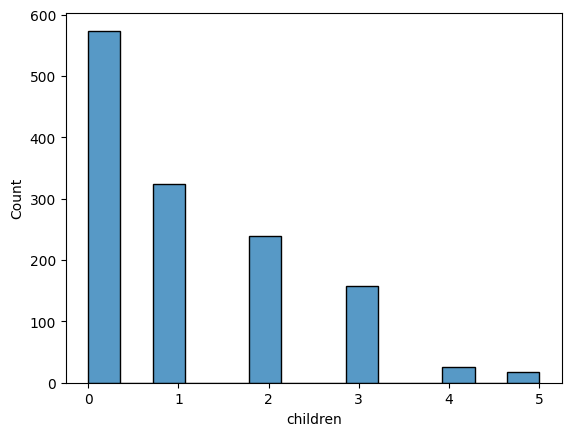

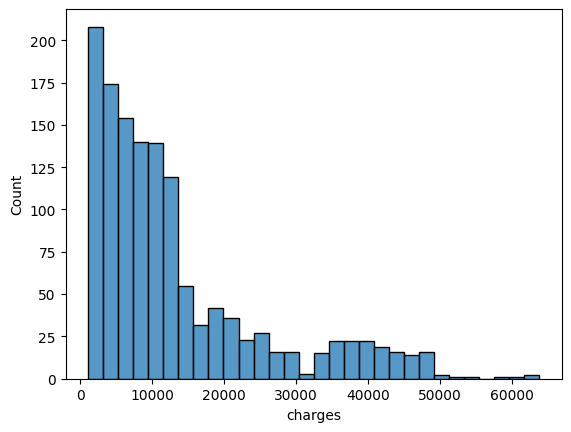

In [109]:
# Histogram to understand the distribution 
for i in pofic.select_dtypes(include="number").columns:
    import warnings
    warnings.filterwarnings("ignore")
    sns.histplot(data=pofic,x=i)
    plt.show()

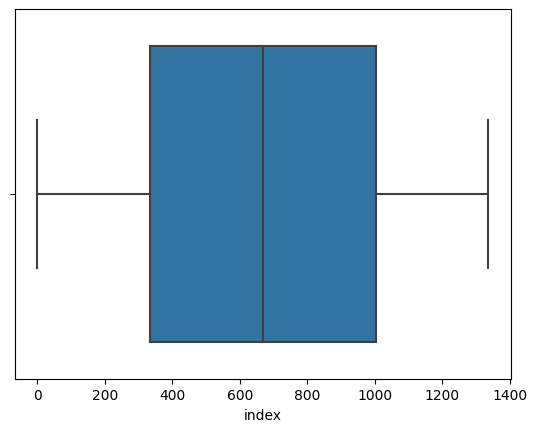

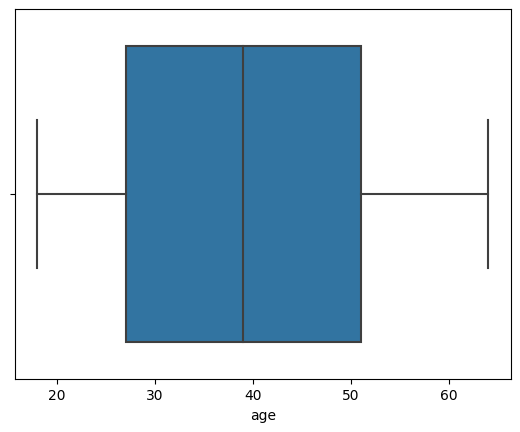

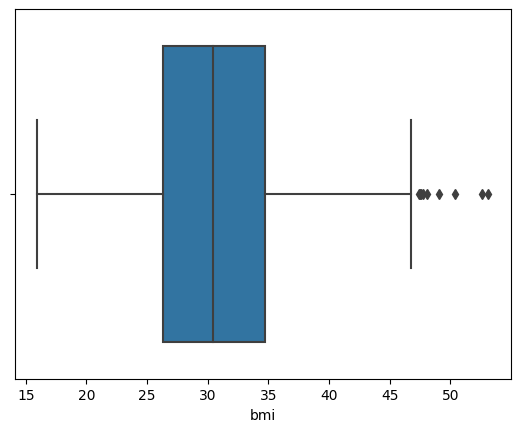

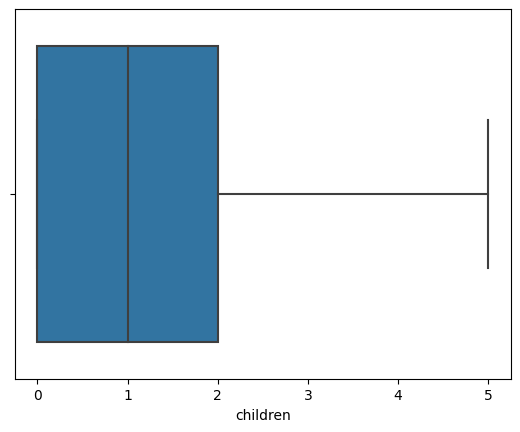

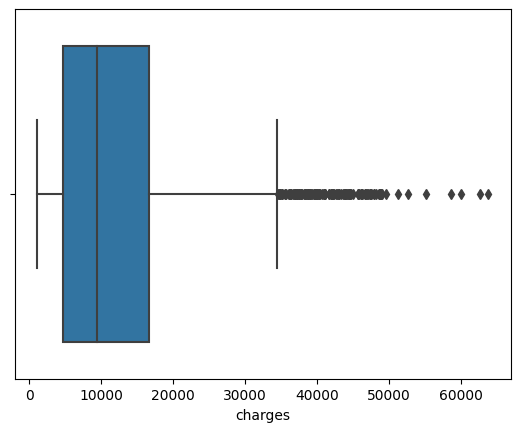

In [110]:
# Box plot
for i in pofic.select_dtypes(include="number").columns:
    import warnings
    warnings.filterwarnings("ignore")
    sns.boxplot(data=pofic,x=i)
    plt.show()

In [111]:
pofic.select_dtypes(include="number").columns

Index(['index', 'age', 'bmi', 'children', 'charges'], dtype='object')

In [112]:
pofic.select_dtypes(include="number").corr()

,index,age,bmi,children,charges
index,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


In [113]:
p=pofic.select_dtypes(include="number").corr()

<Axes: >

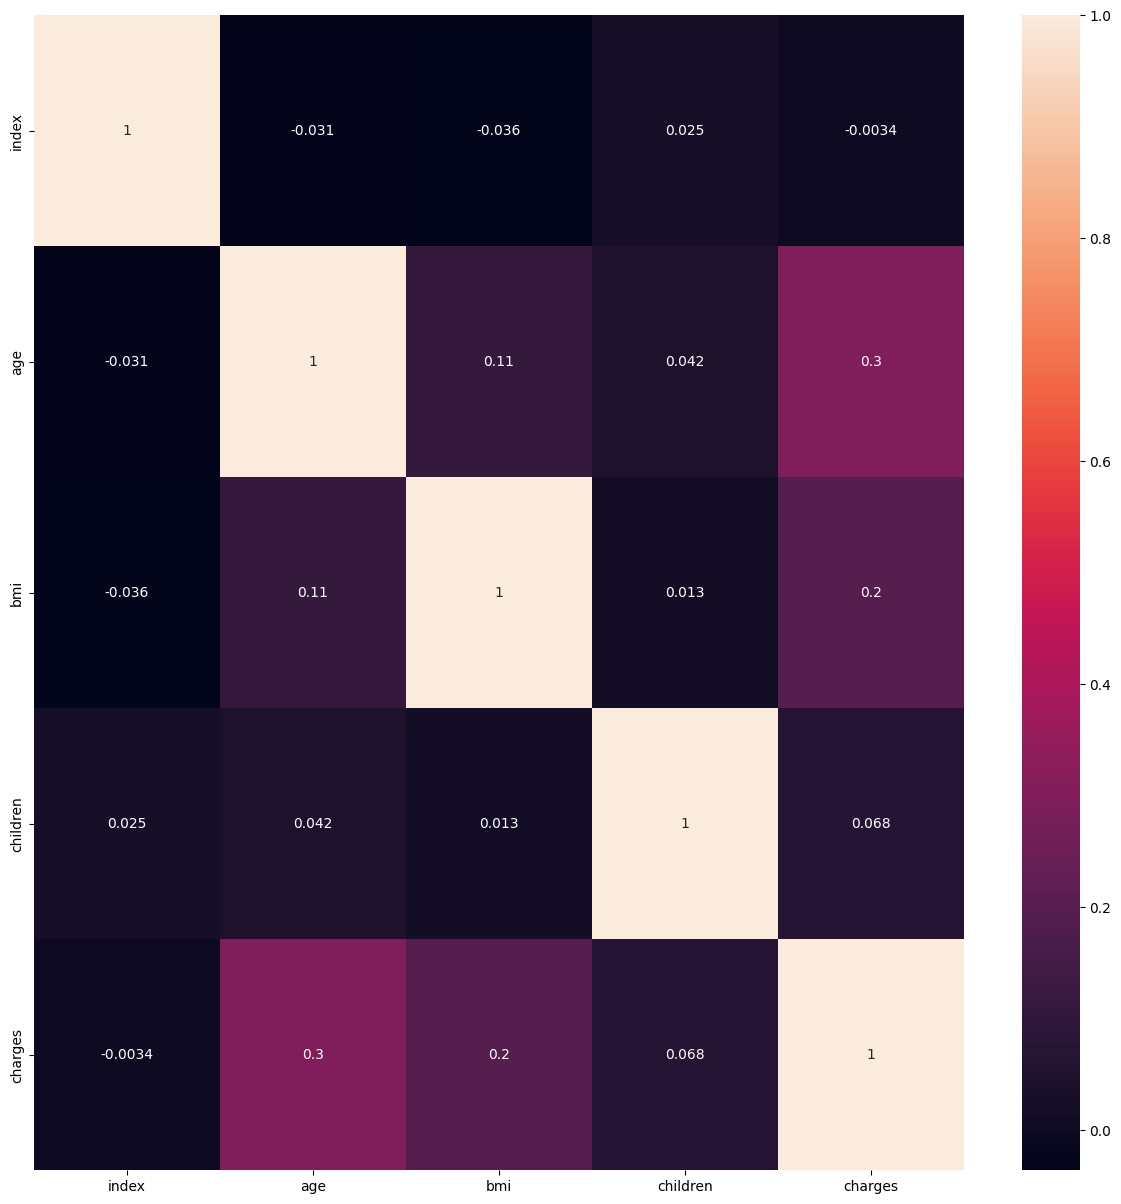

In [114]:
plt.figure(figsize=(15,15))
sns.heatmap(p,annot=True)

In [115]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Age

In [116]:
fig = px.histogram(pofic, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# Body Mass Index
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [117]:
fig = px.histogram(pofic, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.
> **Insight**:why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
>As there are same number of people in age groups the distribution we get is uniform distribution.But, for BMIs distribution we get gaussian distribution as people who are between 20-3- are considered to be healthy relatively and less than or more than this range is considered to be health risk categories and these people are more prone to health issues and thus company will have to pay more medical bills of this kind of customers and thus they provide these type of people same health insuarance at higher prices and which in-turn attracts lesser people with out of healthy range BMI because they have to pay more. 

# Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [118]:
fig = px.histogram(pofic, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['red', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

# Visualization of the distribution of medical charges in connection with other factors like "sex" and "region"

In [119]:
fig = px.histogram(pofic,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'
               
)
fig.update_layout(bargap=0.1)
fig.show()

In [120]:
fig = px.histogram(pofic,
                  x = "charges",
                  marginal = 'box', 
                   color="region",
                  title = "charges over different regions ")
fig.update_layout(bargap=0.1)
fig.show()

Here in the distribution of charges over gender we see that males are substancially charged more because by subconsious behaviour males are exploratory and they are more likely to take risks and that keeps them in danger more than their counterpart.It is also evident that males of U.S are more inclined to get health insuarrance then female. And, in second distribution we see that southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only.

# Smoker
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [121]:
pofic.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [122]:
px.histogram(pofic, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke.We can also see that smoking appears a more common habit among males. This is true for the given dataset only and so we should always verify if these results of analysis also matches the general population which we are going to use our model on otherwise the model will assume that in general population also 20 % people are smokers but in reality it was only 10 % so we would get incorrect predictions.So it is best to check if our primary data analysis matches the results of the general public.

# Visualization of the distributions of the "sex", "region" and "children" columns

In [123]:
fig = px.histogram(pofic,
                  x = 'charges',
                   marginal ="box",
                  color = 'children',
                  title = 'charges incurred by children')
fig.update_layout(bargap=0.1)
fig.show()

- It seems that majority of our customers have 0 or 1 child and median charges vary between 8.5k to 11k dollars
- We can also conclude that people who have more children are given less priority in terms of pricing discounts
- Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns

# Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [124]:
fig = px.scatter(pofic, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     

> **Insight**: What other inferences can we draw from the above chart?
>
> even if you have ailment or not people who are smokers for majority of the cases incurred more charges in medical bills than non-smokers and this difference is not small it is in the range of 5000 to 1000 $

# BMI and Charges
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [125]:
fig = px.scatter(pofic, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# Visualizing how the "charges" column is related to other columns ("children", "sex", "region" and "smoker").

In [126]:
px.violin(pofic,x = 'children',y = 'charges')

<Axes: xlabel='sex', ylabel='charges'>

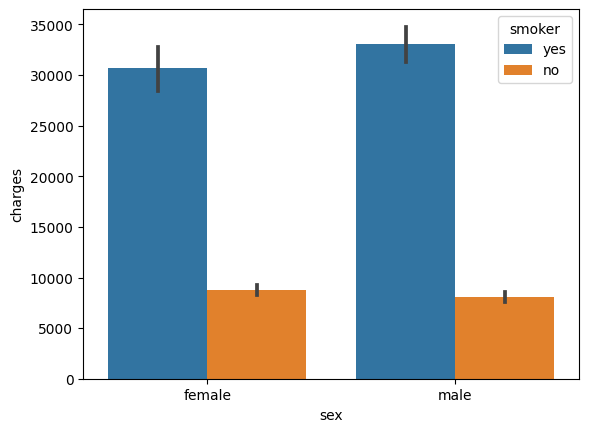

In [127]:
sns.barplot(data = pofic,x = 'sex',y = 'charges',hue = "smoker")

# Correlation

In [128]:
pofic.charges.corr(pofic.age)

0.2990081933306476

In [129]:
pofic.charges.corr(pofic.bmi)

0.19834096883362895

In [130]:
pofic.children.corr(pofic.charges)

0.0679982268479048

In [131]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = pofic.smoker.map(smoker_values)
pofic.charges.corr(smoker_numeric)

0.787251430498478

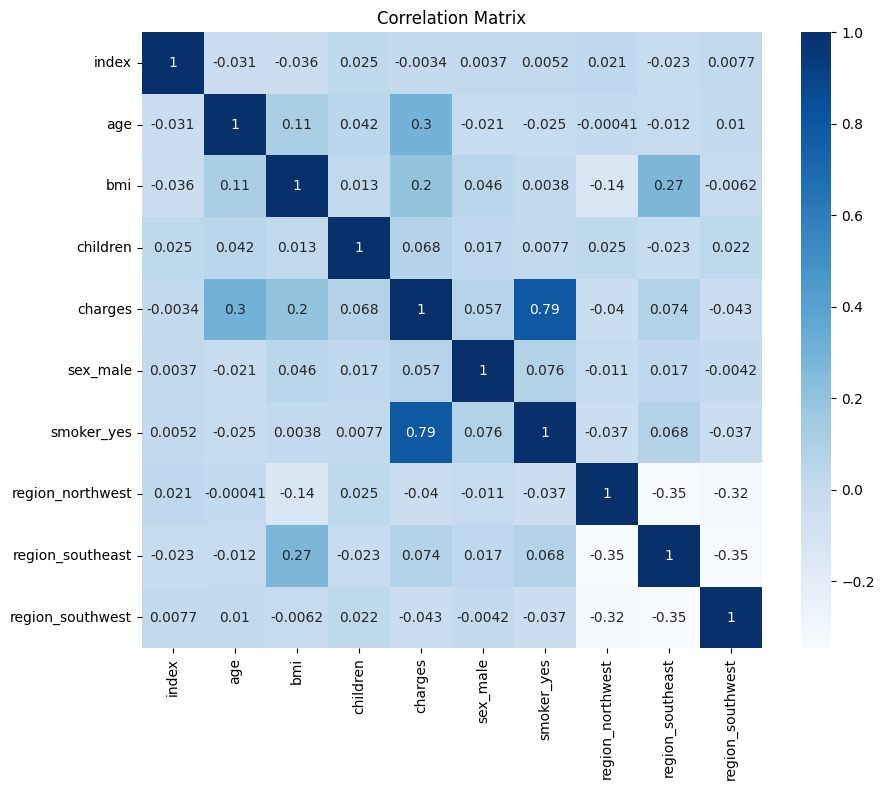

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: One-hot encode the categorical columns
pofic_encoded = pd.get_dummies(pofic, drop_first=True)

# Step 2: Compute the correlation matrix
correlation_matrix = pofic_encoded.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)
plt.title('Correlation Matrix')
plt.show()


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# sklearn...
from sklearn.utils import check_random_state
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression

#  Linear Regression using a Single Feature
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [134]:
non_smoker_df =pofic[pofic.smoker == 'no']

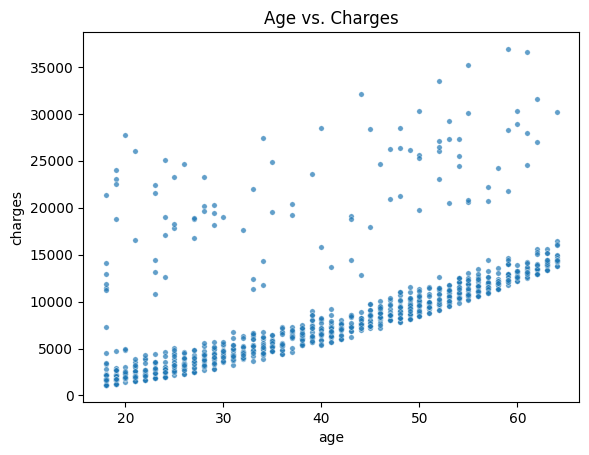

In [135]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assume the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function estimate_charges, to compute $charges$, given $age$, $w$ and $b$.


In [136]:
def estimate_charges(age, w, b):
    return w * age + b

In [137]:
w=50
b=100

In [138]:
estimate_charges(30,w,b)

1600

In [139]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [140]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

# We can plot the estimated charges using a line graph.

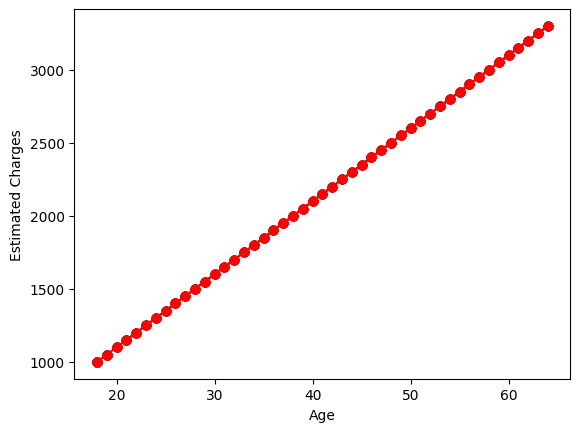

In [141]:
plt.scatter(ages, estimated_charges);
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

- As expected, the points lie on a straight line.

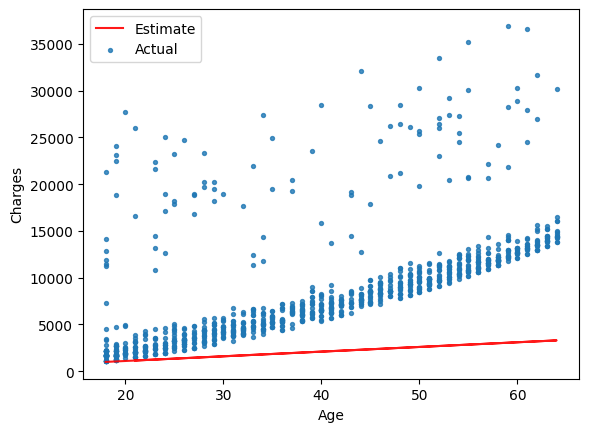

In [142]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

- Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of  𝑤
  and  𝑏
  to move the line around. Let's define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [143]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);   

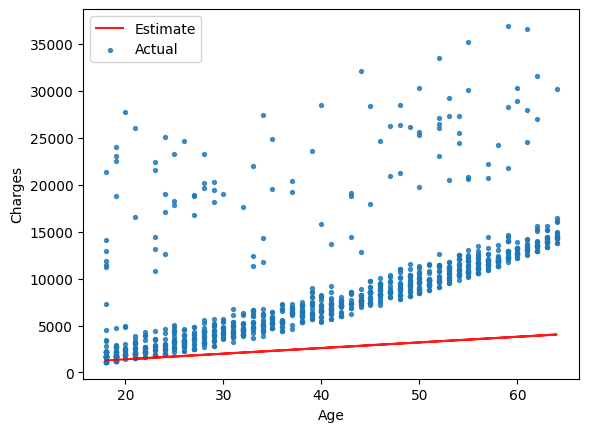

In [144]:
try_parameters(60, 200)

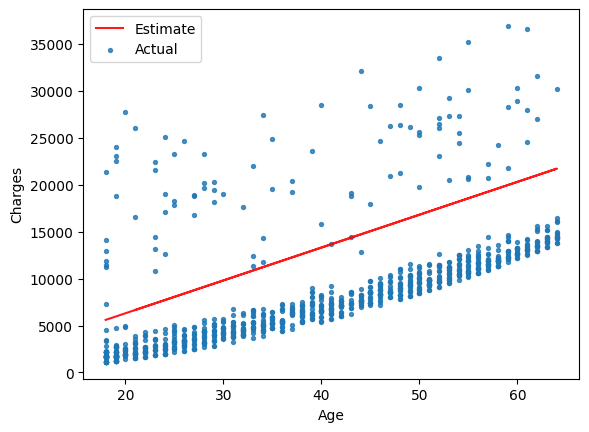

In [145]:
try_parameters(350,-700)

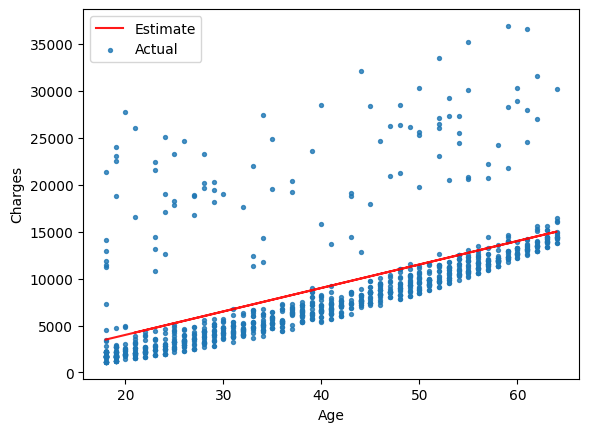

In [146]:
try_parameters(250,-1000)

- So,as we decreased the value of b line started coming down and value of w needed to be calibrated as slope was demonstrating wrongful predictions, if we increase the value of w slope of the line increases and vice versa.

# Loss/Cost Function
We can compare our model's predictions with the actual targets using the following method:

For a Loss function we can use root-mean-squared-method which first calculate the difference between tagets and predictions made by model after that,square of the obtained value is carried out to eliminate the possibility of negative numbers.next comes the mean of the elements and finally to balance out the squaring we square root the results obtained in previous step and thus by this we get our Loss function eligent and very useful.

Let's define a function to compute the RMSE.

In [147]:
!pip install numpy --quiet

In [148]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

- compute the RMSE for our model with a sample set of weights

In [149]:
w=50
b=100

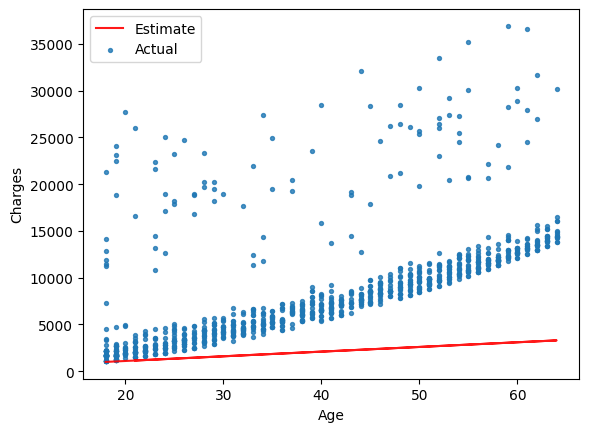

In [150]:
try_parameters(w, b)

In [151]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [152]:
rmse(targets, predicted)

8461.949562575493

- The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss.

In [153]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)


RMSE Loss:  8461.949562575493


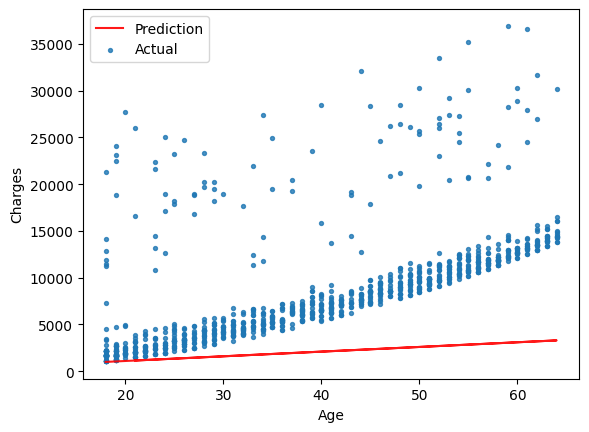

In [154]:
try_parameters(50, 100)

RMSE Loss:  4673.637609506453


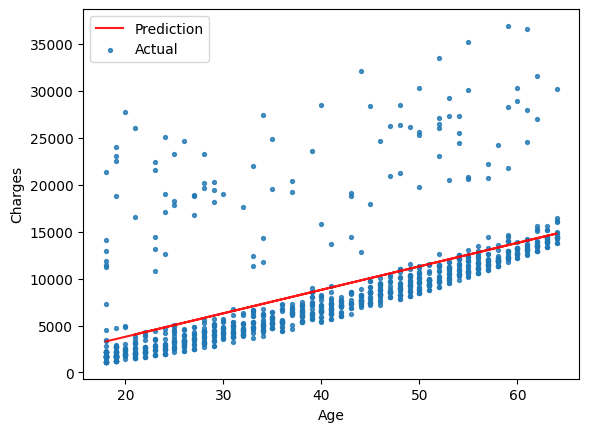

In [155]:
try_parameters(250,-1200)

RMSE Loss:  4664.426039892948


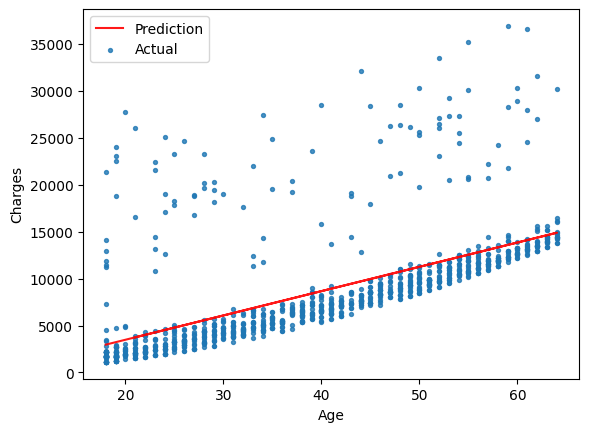

In [156]:
try_parameters(259,-1700)

- for the value w = 259 and b = -1700 i got the RMSE value of 4664$ which was the lowest i could get after trying many values.for trial and error you should try by increasing values of parameter by high differences and if try some smaller difference values and incline to choose value of both upper and lower limit which present lower rmse.it's like binary sort algorithm and if you combine this strategy with gradient decent strategy you get a accurate parameters with faster execution

# Optimizer
Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

# Linear Regression using Scikit-learn
above methods are created by us manually but in practice we are periodically be using Scikit-learn as it contains all the necessary ML functions and libraries

In [157]:
!pip install scikit-learn --quiet

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [159]:
model = LinearRegression()

In [160]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


- Let's fit the model to the data.

In [161]:
model.fit(inputs, targets)

LinearRegression()

In [162]:
predictions = model.predict(inputs)

In [163]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

- compute the RMSE loss to evaluate the model.

In [164]:
rmse(targets, predictions)

4662.505766636395

- Seems like our prediction is off by $4000 on average, which is not too bad

- The parameters of the model are stored in the coef_ and intercept_ properties.

In [165]:
print(model.coef_)

print(model.intercept_)

[267.24891283]
-2091.4205565650864


-  Use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique

In [166]:
model1 = SGDRegressor()

In [167]:
model1.fit(inputs,targets)

SGDRegressor()

In [168]:
predictions = model1.predict(inputs)
rmse(targets, predictions)

5070.215183731083

# Model creation for Smokers in the dataset

In [169]:
smoker_df = pofic[pofic.smoker == 'yes']
smoker_df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
11,11,62,female,26.290,0,yes,southeast,27808.72510
14,14,27,male,42.130,0,yes,southeast,39611.75770
19,19,30,male,35.300,0,yes,southwest,36837.46700
23,23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...,...
1313,1313,19,female,34.700,2,yes,southwest,36397.57600
1314,1314,30,female,23.655,3,yes,northwest,18765.87545
1321,1321,62,male,26.695,0,yes,northeast,28101.33305
1323,1323,42,female,40.370,2,yes,southeast,43896.37630


In [170]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('',inputs.shape)
print('',targets.shape)

 (274, 1)
 (274,)


In [171]:
model.fit(inputs,targets)

LinearRegression()

In [172]:
predicted = model.predict(inputs)
print('RMSE:',)
rmse(targets,predicted)


RMSE:


10711.00334810241

# Machine Learning

In [173]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


# Linear Regression using Multiple Features

- So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

- 𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤1×𝑎𝑔𝑒+𝑤2×𝑏𝑚𝑖+𝑏
 
- We need to change just one line of code to include the BMI.

In [174]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


- As we can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [175]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [176]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

- We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [177]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

# Training a linear regression model to estimate charges using BMI alone

In [178]:
inputs,targets = non_smoker_df[['bmi']],non_smoker_df['charges']

In [179]:
model = LinearRegression().fit(inputs, targets)

In [180]:
predictions=model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss:',loss)

Loss: 5969.772531913293


- As BMI has very less correlation with charges we get a higher loss on a model which predicts charges on the basis of BMI as a independent variable as seen above loss value is increased which is a degradtion in our model

In [181]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [182]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [183]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


- Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

In [184]:
inputs,targets = smoker_df[['age','children','bmi']],smoker_df['charges']

In [ ]:
model = LinearRegression().fit(inputs, targets)
prediction = model.predict(inputs)

- Repeating the steps in this section to train a linear regression model to estimate medical charges for all customers.

In [ ]:
# Create inputs and targets
inputs, targets = pofic[['age', 'bmi', 'children']], pofic['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# Using Categorical Features for Machine Learning

# Binary Categories

- The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".

In [ ]:
sns.barplot(data=pofic, x='smoker', y='charges');

In [ ]:
smoker_codes = {'no': 0, 'yes': 1}
pofic['smoker_code'] = pofic.smoker.map(smoker_codes)

In [ ]:
pofic.charges.corr(pofic.smoker_code)

In [ ]:
pofic

- We can now use the smoker_df column for linear regression.

In [ ]:
# Create inputs and targets
inputs, targets = pofic[['age', 'bmi', 'children', 'smoker_code']], pofic['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

- The loss reduces from 11355 to 6056, almost by 50%! This is an important lesson: never ignore categorical data.


In [ ]:
sns.barplot(data=pofic, x='sex', y='charges')

In [ ]:
sex_codes = {'female': 0, 'male': 1}

pofic['sex_code'] = pofic.sex.map(sex_codes)

In [ ]:
pofic.charges.corr(pofic.sex_code)

In [ ]:
# Create inputs and targets
inputs, targets = pofic[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], pofic['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# One-hot Encoding
The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

In [ ]:
sns.barplot(data=pofic, x='region', y='charges');

In [ ]:
from sklearn import preprocessing
abc = preprocessing.OneHotEncoder()
abc.fit(pofic[['region']])
abc.categories_

In [ ]:
abc.transform([['northeast']]).toarray()

In [ ]:
one_hot = abc.transform(pofic[['region']]).toarray()
one_hot

In [ ]:
pofic

# Model Improvements
- Feature Scaling

1. To compare the importance of each feature in the model, our first instinct might be to compare their weights.

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(pofic[numeric_cols])

In [ ]:
scaler.mean_

In [ ]:
scaler.var_

- We can now scale data as follows:

In [ ]:
pofic[numeric_cols]

In [ ]:
scaled_inputs = scaler.transform(pofic[numeric_cols])
scaled_inputs

In [ ]:
new_customers = [[28,30,2,1,0,0,1,0,0.]]
scaler.transform([[28,30,2]])

# Creating a Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2,random_state=0)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

- Let's compare this with the training loss

In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

### Workflow of Machine Learning Problem

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

# Conclusion
In conclusion, our project on predicting health insurance charges has highlighted the intricate relationship between various personal and demographic factors and the resulting healthcare costs. By analyzing key variables such as age, gender, medical history, lifestyle choices, and geographic location, we have developed a robust model that not only estimates annual healthcare expenses but also offers insights into the underlying trends affecting these costs.

The findings underscore the importance of a comprehensive understanding of individual risk profiles when it comes to health insurance pricing. As healthcare costs continue to rise, insurers and policymakers can leverage our predictive model to create more equitable and tailored insurance plans. This can lead to better resource allocation, improved patient outcomes, and ultimately, a more sustainable healthcare system.

Future work could explore the integration of additional factors such as socioeconomic status and environmental influences to refine our predictions further. By continuously updating our model with real-world data, we can enhance its accuracy and applicability, paving the way for informed decision-making in health insurance and healthcare delivery.

Overall, this project not only serves as a valuable tool for stakeholders in the health insurance industry but also contributes to a greater understanding of how personal choices and circumstances impact healthcare costs.